# **Classificação Fumante: Regressão Logística, KNN e Árvore de Decisão**

Como foi visto nos anteriores caso (**KNN**, **RLinear** ou **Árvore de Decisãao**) o fato de ser ou não fumante afeta muito o valor dos custos médicos quando falamos de seguro de saúde, portanto é possível de que a passoa omita o fato de ser fumante ou não. Esta omissão pode ser considerada como fraude e traz um grande perjuizo nas empresas que brindam estes planos.  

Em principio não teríamos a necesidade de prever a variável fumante (definida por Sim =1  e Não = 0). Assume-se que esta é uma variável cadastral, mas por se uma variável muito importante no cálculo dos custos médicos do plano de saúde é muito importante examinar a veracidade das informações dos dados cadastrais. Isto é, a idea não é predecir se a pessoa é fumante ou não, a ideia fundamental é verificar as informações fornecidas (ser fumante) para evitar perjuizo.

Com base nesta necessidade, a ideia neste problema é determinar se um novo elemento corresponde ou não a alguma das categorias (0, 1) de uma determinada variável (Fumante).

Para nosso caso ilustrativo vamos determinar (classificar) se elementos correspondem a uma determinada característica (variável fumante) usando como informação os dados de custos médicos. 

---


# Importação dos Dados:

Os dados podem ser obtido do site do Kaggle.com. Podemos fazer um download e depois abrir ou também importar diretamente usando um link onde esta o arquivo. Esses dados serão guardados na variável **dados** do tipo _dataframe_.

In [ ]:
# importação via github 
import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)

# mise un place
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

# separação de variáveis preditoras e variával resposta
X = dados[['bmi', 'charges']]
y = dados['smoker'] 

# Informações dos dados e Mise en place:

Obter informações gerais dos dados como número de variáveis, tipo, etc. Os comandos podem ser visualizados e entendidos melhor nos anteriores scripts (Custos_Medicos.ipynb, etc)

Lembrar o que foi feito nos modelos anteriores:

* Transformar a variável **Fumante** em 0 (não) ou 1 (sim)
* Colocar a variável resposta na escala para cada mil dolares.

Nesta análise também vamos considerar só as variáveis:
* var. dependiente: **Fumante**
* var. independientes: índice de massa corporal (**IMC**) e o **custo**

## Upgrade na Técnica de Validação: _K-FOLD_

Esta técnica de validação separamos os dados em K parte  

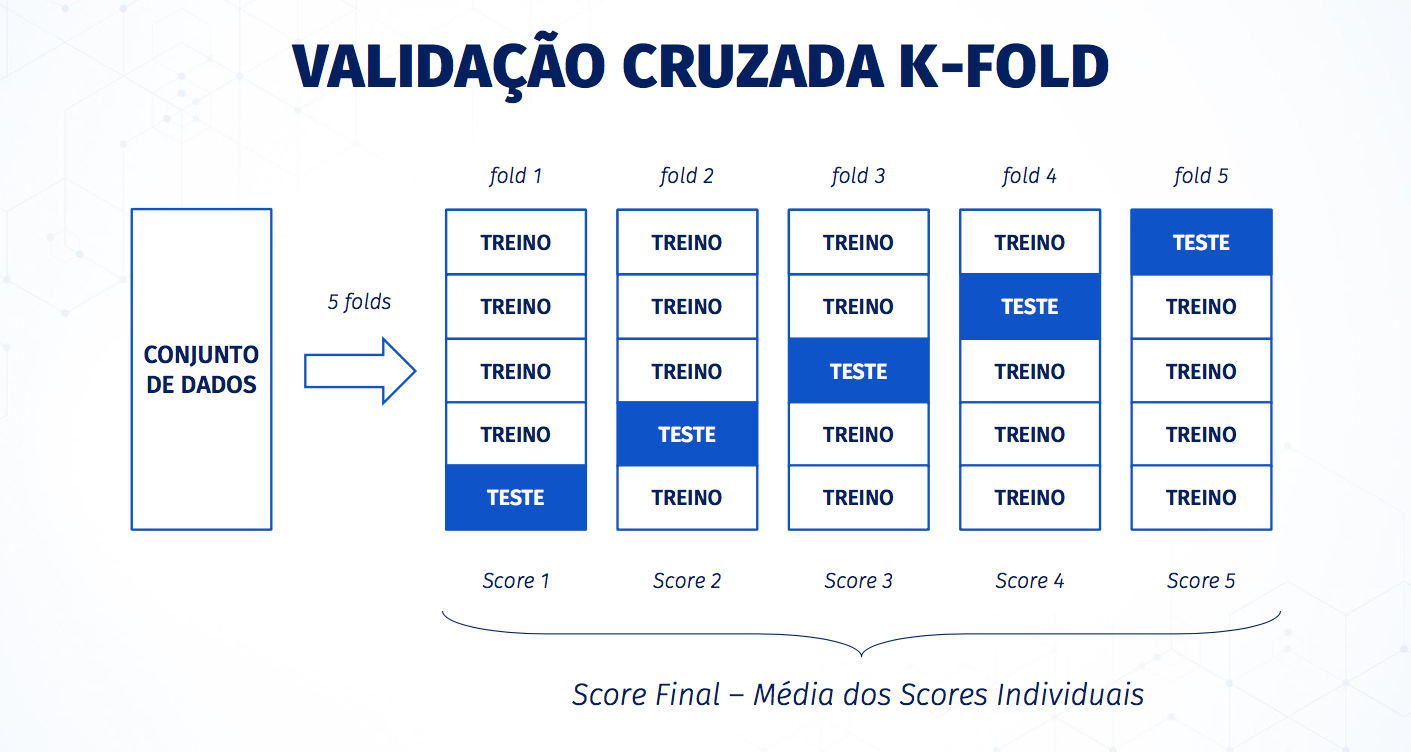



Neste método de validação todos os elementos do conjunto de dados vão para teste pelo menos uma vez. No gráfico acima temos um K=5 então o conjunto de dados é dividido em 5 parte e feito 5 vezes, e o score final é calculado da média destes grupos individuais.

Para a validação chamamos a biblioteca _sklearn.model_selection_ 

aplicando as funções:
   * _KFold_ ~> define os parametros de validação
   * _cross_validate_ -> a função que faz a validação cruzada e calcula a métrica.

_n_splits: definição das partes

_suffle_ : (embaralhar) indica que cada vez que rodar ela va a gerar uma novas distribuição.

In [ ]:
# Configuração da Validação Cruzada

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

validacao = KFold(n_splits = 10, shuffle = True)

---
---

## Regressão Logística

Primeiro temos que importar a biblioteca -> _sklearn.linear_model_

onde será usada a função -> _LogisticRegression_

_cross_validate_ -> a função que faz a validação cruzada e calcula a métrica (modelo, conjunto de dados, tipo de validação, a métrica en funcao de ... )

Dando como resultado um dicionario:

   * Fit_time: tempo que levou para ajustar cada modelo
   * score_time: tempo que levou para verificar a métrica
   * test_score: a métrica de cada parte (acurácia 1, acurácia 2, ...)

In [ ]:
from sklearn.linear_model import LogisticRegression 

modelo = LogisticRegression() 
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')   
reglog

{'fit_time': array([0.01947808, 0.00985765, 0.01052594, 0.01042914, 0.01077008,
        0.00995898, 0.01020098, 0.0096817 , 0.0096457 , 0.01045322]),
 'score_time': array([0.00240874, 0.00142479, 0.00148654, 0.00150418, 0.00145531,
        0.00146675, 0.00141096, 0.00146937, 0.00140166, 0.00144601]),
 'test_score': array([0.93283582, 0.92537313, 0.86567164, 0.91791045, 0.96268657,
        0.94776119, 0.94776119, 0.97014925, 0.90977444, 0.93984962])}

In [ ]:
reglog['test_score']

array([0.93283582, 0.92537313, 0.86567164, 0.91791045, 0.96268657,
       0.94776119, 0.94776119, 0.97014925, 0.90977444, 0.93984962])

Calculamos a média dos resultados da acurácias: dando como média 0.93 

In [ ]:
reglog['test_score'].mean()

0.9319773313881718

Lembrar que por definição temos:

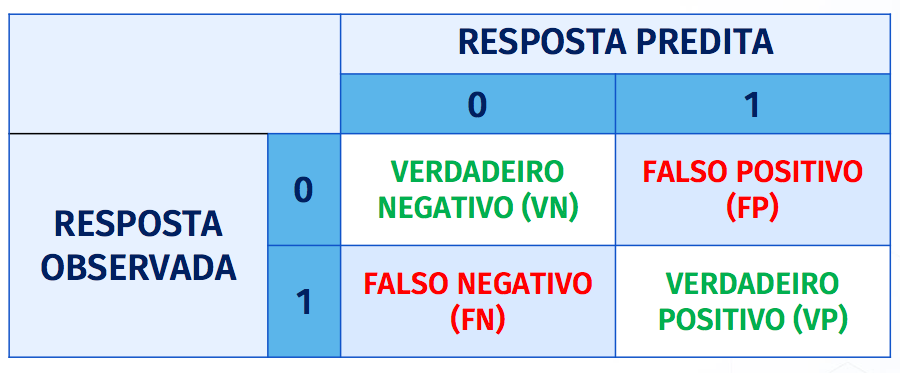

$Acur\acute{a}cia = \frac{VN + VP}{VN + VP +FN + FP}  \:\:\:\:\:\:\:\:\:\:\:\:  Sensibilidade = \frac{VP}{VN + VP} \:\:\:\:\:\:\:\:\:\:\:\:  Precis\tilde{a}o = \frac{VP}{VP + FP} $

In [ ]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision'])   

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9328
Sensibilidade: 0.7998
     Precisão: 0.8562


Gráficamos a região de clasificação: Para isto usamos uma separação simple de treino e teste, só de forma ilustrativa. 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


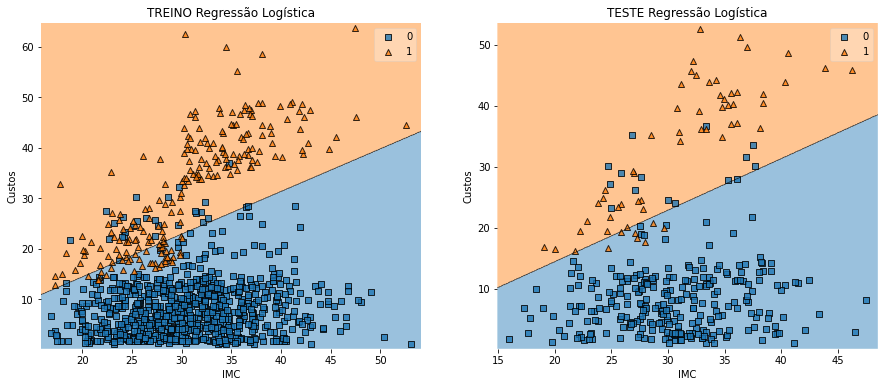

In [ ]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
 
Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

## KNN (Classificação)

Primeiro temos que importar a biblioteca -> _sklearn.neighbors_

onde será usada a função -> _KNeighborsClassifier_  com K= 7

_cross_validate_ -> a função que faz a validação cruzada e calcula a métrica (modelo, conjunto de dados, tipo de validação, a métrica en função de ... )

Dando como resultado os valores de acurácia, sensibilidade e precisão.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

k = 7
modelo = KNeighborsClassifier(n_neighbors = k) 
knn = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(knn['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(knn['test_recall'].mean(), 4))
print('     Precisão:', round(knn['test_precision'].mean(), 4))

     Acurácia: 0.9581
Sensibilidade: 0.9383
     Precisão: 0.8625


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


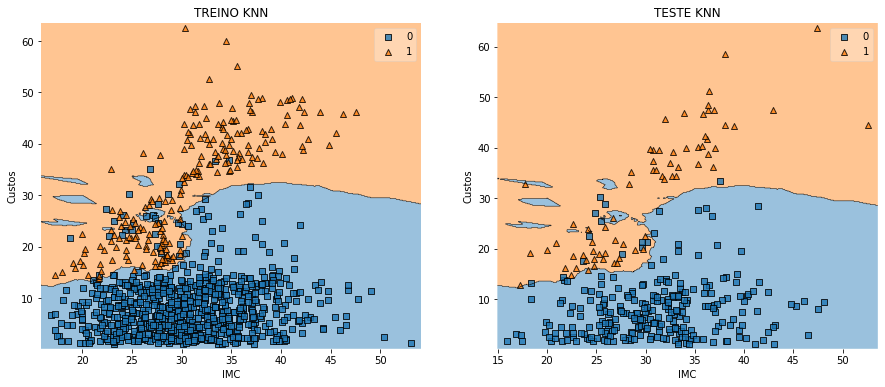

In [ ]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

## Árvores de Decisão (Classificação)

Primeiro temos que importar a biblioteca -> _sklearn.tree_

onde será usada a função -> _DecisionTreeClassifier_  com profundidade = 5 e a amostra mínima = 20 elementos.

_cross_validate_ -> a função que faz a validação cruzada e calcula a métrica (modelo, conjunto de dados, tipo de validação, a métrica en função de ... )

Dando como resultado os valores de acurácia, sensibilidade e precisão.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

profundidade = 5
amostra_minima = 20
modelo = DecisionTreeClassifier(max_depth = profundidade, min_samples_split = amostra_minima)
arvore = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(arvore['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(arvore['test_recall'].mean(), 4))
print('     Precisão:', round(arvore['test_precision'].mean(), 4))

     Acurácia: 0.9484
Sensibilidade: 0.8893
     Precisão: 0.8694


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


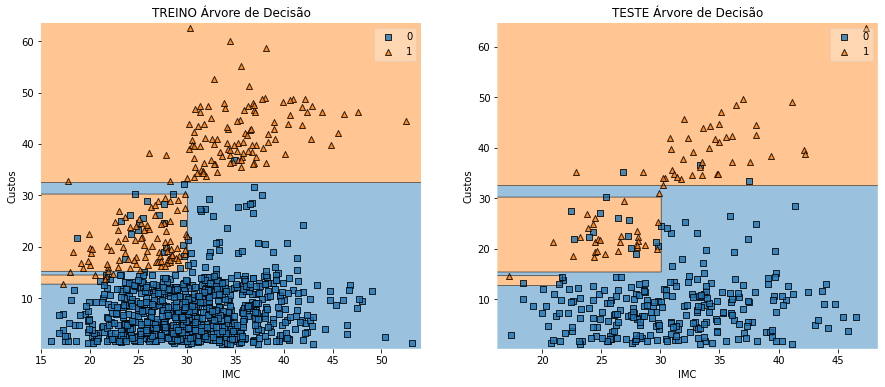

In [ ]:
# Região de Decisão

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Árvore de Decisão')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Árvore de Decisão')   

plt.show()

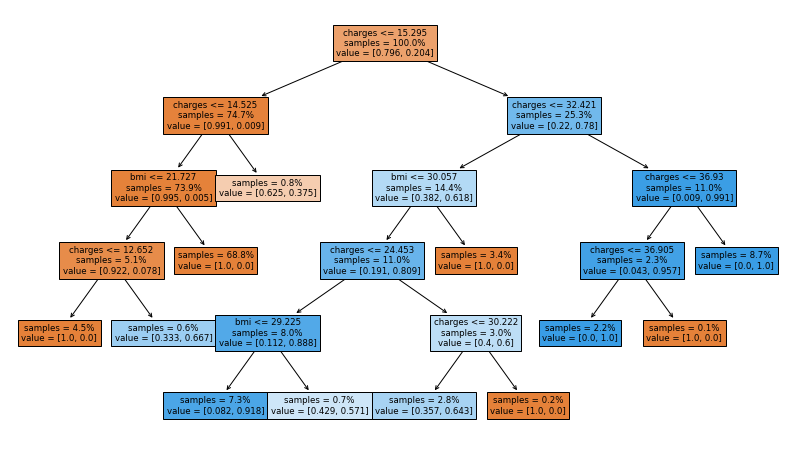

In [ ]:
# Plot da Árvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

---
---

## **Comparação de Modelos via Validação Cruzada K-FOLD**

Como será feita uma comparação entre os modelo: **Árvore de Decisão** (com diferentes valores de profundidades), de **K-NN** (com diferentes valores de k) e de **Regressão Logística** é preferível criar uma função a qual será chamada por cada modelo.  

In [ ]:
modelos = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logística',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Acurácia', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
Árvore - Prof = 3,0.9634,0.9722,0.8641
Árvore - Prof = 4,0.9619,0.9648,0.8668
KNN - K = 35,0.9597,0.9597,0.8638
KNN - K = 45,0.9596,0.9664,0.8571
KNN - K = 25,0.9596,0.9672,0.8605
KNN - K = 15,0.9589,0.9585,0.8603
KNN - K = 5,0.9574,0.9348,0.8704
Árvore - Prof = 5,0.9521,0.9020,0.8695
Regressão Logística,0.9312,0.8028,0.8518
Árvore - Prof = 2,0.9268,0.9622,0.7536


---

## Conclusão

Nesta análise usando os diferentes modelos obtivemos os melhores resultados de acurácia para a árvore de decisão com valores de profundidade 3 e 4. De cada cem elementos só erramos em 4 a classificação. 

A realização dos teste de validação mostra que a acurácia é maior  para o modelo de **Árvore de Decisão**, quando comparada aos modelos de  **Regressão Logística** ou **K-NN**, portanto podemos considerar que o modelo de **Árvore de Decisão** é melhor para este caso.

Para próximas análises serão incluidas novas variáveis e espera-se melhorar o valor do **acurácia** e que os resultados sejam igual de consistentes.